<h1 align=center><font size = 5>Exercise: Hierarchical Clustering in R</font></h1>

In this exercise, we will use the Hierarchical clustering algorithm to cluster weather station data. let's start playing with the data. We will be working according to the following workflow: </font>
1. Loading data
- Overview data
- Data cleaning
- Data selection
- Clusteing

In this notebook, we will use the weather data, and will be using only the columns with names listed in <font color = "green">green</font>.

<h4 align = "center">
Environment Canada    
Monthly Values for July - 2015	
</h4>
<html>
<head>
<style>
table {
    font-family: arial, sans-serif;
    border-collapse: collapse;
    width: 100%;
}

td, th {
    border: 1px solid #dddddd;
    text-align: left;
    padding: 8px;
}

tr:nth-child(even) {
    background-color: #dddddd;
}
</style>
</head>
<body>

<table>
  <tr>
    <th>Name in the table</th>
    <th>Meaning</th>
  </tr>
  <tr>
    <td><font color = "green"><strong>Stn_Name</font></td>
    <td><font color = "green"><strong>Station Name</font</td>
  </tr>
  <tr>
    <td><font color = "green"><strong>Lat</font></td>
    <td><font color = "green"><strong>Latitude (North+, degrees)</font></td>
  </tr>
  <tr>
    <td><font color = "green"><strong>Long</font></td>
    <td><font color = "green"><strong>Longitude (West - , degrees)</font></td>
  </tr>
  <tr>
    <td>Prov</td>
    <td>Province</td>
  </tr>
  <tr>
    <td>Tm</td>
    <td>Mean Temperature (°C)</td>
  </tr>
  <tr>
    <td>DwTm</td>
    <td>Days without Valid Mean Temperature</td>
  </tr>
  <tr>
    <td>D</td>
    <td>Mean Temperature difference from Normal (1981-2010) (°C)</td>
  </tr>
  <tr>
    <td><font color = "black">Tx</font></td>
    <td><font color = "black">Highest Monthly Maximum Temperature (°C)</font></td>
  </tr>
  <tr>
    <td>DwTx</td>
    <td>Days without Valid Maximum Temperature</td>
  </tr>
  <tr>
    <td><font color = "black">Tn</font></td>
    <td><font color = "black">Lowest Monthly Minimum Temperature (°C)</font></td>
  </tr>
  <tr>
    <td>DwTn</td>
    <td>Days without Valid Minimum Temperature</td>
  </tr>
  <tr>
    <td>S</td>
    <td>Snowfall (cm)</td>
  </tr>
  <tr>
    <td>DwS</td>
    <td>Days without Valid Snowfall</td>
  </tr>
  <tr>
    <td>S%N</td>
    <td>Percent of Normal (1981-2010) Snowfall</td>
  </tr>
  <tr>
    <td><font color = "green"><strong>P</font></td>
    <td><font color = "green"><strong>Total Precipitation (mm)</font></td>
  </tr>
  <tr>
    <td>DwP</td>
    <td>Days without Valid Precipitation</td>
  </tr>
  <tr>
    <td>P%N</td>
    <td>Percent of Normal (1981-2010) Precipitation</td>
  </tr>
  <tr>
    <td>S_G</td>
    <td>Snow on the ground at the end of the month (cm)</td>
  </tr>
  <tr>
    <td>Pd</td>
    <td>Number of days with Precipitation 1.0 mm or more</td>
  </tr>
  <tr>
    <td>BS</td>
    <td>Bright Sunshine (hours)</td>
  </tr>
  <tr>
    <td>DwBS</td>
    <td>Days without Valid Bright Sunshine</td>
  </tr>
  <tr>
    <td>BS%</td>
    <td>Percent of Normal (1981-2010) Bright Sunshine</td>
  </tr>
  <tr>
    <td>HDD</td>
    <td>Degree Days below 18 °C</td>
  </tr>
  <tr>
    <td>CDD</td>
    <td>Degree Days above 18 °C</td>
  </tr>
  <tr>
    <td>Stn_No</td>
    <td>Climate station identifier (first 3 digits indicate   drainage basin, last 4 characters are for sorting alphabetically).</td>
  </tr>
  <tr>
    <td>NA</td>
    <td>Not Available</td>
  </tr>


</table>

</body>
</html>



### Install and import required libraries

In [2]:
# import libraries
install.packages('ggdendro')
library(ggdendro)
library(ggplot2)


  There is a binary version available but the source version is later:
         binary source needs_compilation
ggdendro 0.1.22 0.1.23             FALSE



installing the source package 'ggdendro'

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


### 1. Loading the data
Since the dataset was uploaded to a Box folder, we can use the ***download.file*** command to download the dataset, and load the data using the ***read.csv*** command.

In [3]:
# download file and save it to weather and load data
download.file("https://ibm.box.com/shared/static/mv6g5p1wpmpvzoz6e5zgo47t44q8dvm0.csv", destfile = "WeatherStations.csv", quiet = FALSE)
WeatherStations <- read.csv("WeatherStations.csv", sep =',')

### 2. Overview of the data
Using __head__ and __str__, take a quick look in the data before processing it.

In [4]:
head(WeatherStations)
str(WeatherStations)



Stn_Name,Lat,Long,Prov,Tm,DwTm,D,Tx,DwTx,Tn,...,DwP,P.N,S_G,Pd,BS,DwBS,BS.,HDD,CDD,Stn_No
CHEMAINUS,48.935,-123.742,BC,8.2,0,NA,13.5,0,1.0,...,0,NA,0,12,NA,NA,NA,273.3,0,1011500
COWICHAN LAKE FORESTRY,48.824,-124.133,BC,7.0,0,3.0,15.0,0,-3.0,...,0,104,0,12,NA,NA,NA,307.0,0,1012040
LAKE COWICHAN,48.829,-124.052,BC,6.8,13,2.8,16.0,9,-2.5,...,9,NA,NA,11,NA,NA,NA,168.1,0,1012055
DISCOVERY ISLAND,48.425,-123.226,BC,NA,NA,NA,12.5,0,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,1012475
DUNCAN KELVIN CREEK,48.735,-123.728,BC,7.7,2,3.4,14.5,2,-1.0,...,2,NA,NA,11,NA,NA,NA,267.7,0,1012573
ESQUIMALT HARBOUR,48.432,-123.439,BC,8.8,0,NA,13.1,0,1.9,...,8,NA,NA,12,NA,NA,NA,258.6,0,1012710


'data.frame':	1341 obs. of  25 variables:
 $ Stn_Name: Factor w/ 1318 levels "100 MILE HOUSE 6NE",..: 203 255 616 298 307 347 413 680 717 799 ...
 $ Lat     : num  48.9 48.8 48.8 48.4 48.7 ...
 $ Long    : num  -124 -124 -124 -123 -124 ...
 $ Prov    : Factor w/ 13 levels "AB","BC","MB",..: 2 2 2 2 2 2 2 2 2 2 ...
 $ Tm      : num  8.2 7 6.8 NA 7.7 8.8 8.9 7.2 NA NA ...
 $ DwTm    : int  0 0 13 NA 2 0 7 1 NA NA ...
 $ D       : num  NA 3 2.8 NA 3.4 NA NA NA NA NA ...
 $ Tx      : num  13.5 15 16 12.5 14.5 13.1 13.5 12.7 NA NA ...
 $ DwTx    : int  0 0 9 0 2 0 7 1 NA NA ...
 $ Tn      : num  1 -3 -2.5 NA -1 1.9 2 2.2 NA NA ...
 $ DwTn    : int  0 0 9 NA 2 0 7 0 NA NA ...
 $ S       : num  0 0 0 NA 0 NA 0 NA 0 0 ...
 $ DwS     : int  0 0 9 NA 2 NA 7 NA 0 0 ...
 $ S.N     : int  NA 0 NA NA NA NA NA NA 0 0 ...
 $ P       : num  179 259 265 NA 168 ...
 $ DwP     : int  0 0 9 NA 2 8 7 10 0 0 ...
 $ P.N     : int  NA 104 NA NA NA NA NA NA 95 114 ...
 $ S_G     : int  0 0 NA NA NA NA 0 NA 0 0 

### 3. Cleaning the data

We are going to cluster the stations based on the Lat, Long, and Total Precepetation. Is there any missing Lat, Long or Total Precipitation ? If yes, remove entries that have missing values.

In [5]:
WeatherStations <- WeatherStations[complete.cases(WeatherStations$Lat, WeatherStations$Long, WeatherStations$P),]
head(WeatherStations)




,Stn_Name,Lat,Long,Prov,Tm,DwTm,D,Tx,DwTx,Tn,...,DwP,P.N,S_G,Pd,BS,DwBS,BS.,HDD,CDD,Stn_No
1,CHEMAINUS,48.935,-123.742,BC,8.2,0,NA,13.5,0,1.0,...,0,NA,0,12,NA,NA,NA,273.3,0,1011500
2,COWICHAN LAKE FORESTRY,48.824,-124.133,BC,7.0,0,3.0,15.0,0,-3.0,...,0,104,0,12,NA,NA,NA,307.0,0,1012040
3,LAKE COWICHAN,48.829,-124.052,BC,6.8,13,2.8,16.0,9,-2.5,...,9,NA,NA,11,NA,NA,NA,168.1,0,1012055
5,DUNCAN KELVIN CREEK,48.735,-123.728,BC,7.7,2,3.4,14.5,2,-1.0,...,2,NA,NA,11,NA,NA,NA,267.7,0,1012573
6,ESQUIMALT HARBOUR,48.432,-123.439,BC,8.8,0,NA,13.1,0,1.9,...,8,NA,NA,12,NA,NA,NA,258.6,0,1012710
7,GALIANO NORTH,48.985,-123.573,BC,8.9,7,NA,13.5,7,2.0,...,7,NA,0,10,NA,NA,NA,191.7,0,10130MN


Filter for any entries that lie outside of Canada

In [6]:
# Canada Coordinates
llon <- -140
ulon <- -50
llat <- 40
ulat <- 65

filtered_stations <- subset(WeatherStations, Lat > llat & Lat < ulat & Long > llon & Long < ulon)
rownames(filtered_stations) <- 1:nrow(filtered_stations)
head(filtered_stations)





Stn_Name,Lat,Long,Prov,Tm,DwTm,D,Tx,DwTx,Tn,...,DwP,P.N,S_G,Pd,BS,DwBS,BS.,HDD,CDD,Stn_No
CHEMAINUS,48.935,-123.742,BC,8.2,0,NA,13.5,0,1.0,...,0,NA,0,12,NA,NA,NA,273.3,0,1011500
COWICHAN LAKE FORESTRY,48.824,-124.133,BC,7.0,0,3.0,15.0,0,-3.0,...,0,104,0,12,NA,NA,NA,307.0,0,1012040
LAKE COWICHAN,48.829,-124.052,BC,6.8,13,2.8,16.0,9,-2.5,...,9,NA,NA,11,NA,NA,NA,168.1,0,1012055
DUNCAN KELVIN CREEK,48.735,-123.728,BC,7.7,2,3.4,14.5,2,-1.0,...,2,NA,NA,11,NA,NA,NA,267.7,0,1012573
ESQUIMALT HARBOUR,48.432,-123.439,BC,8.8,0,NA,13.1,0,1.9,...,8,NA,NA,12,NA,NA,NA,258.6,0,1012710
GALIANO NORTH,48.985,-123.573,BC,8.9,7,NA,13.5,7,2.0,...,7,NA,0,10,NA,NA,NA,191.7,0,10130MN


### 4. Data selection
Lets Randomly sample dataset for thirty weather stations because we dont want to show a very big dendogram.

In [7]:
number_stations <- 30 # number of stations
set.seed(123) # ensure reproducibility
random_stations <- filtered_stations[sample.int(nrow(filtered_stations))[1:number_stations],]
rownames(random_stations) <- 1:nrow(random_stations)
head(random_stations)

Stn_Name,Lat,Long,Prov,Tm,DwTm,D,Tx,DwTx,Tn,...,DwP,P.N,S_G,Pd,BS,DwBS,BS.,HDD,CDD,Stn_No
BOW ISLAND IRRIGATION AGDM,49.867,-111.383,AB,-4.9,0,NA,14.8,0,-22.2,...,3,NA,NA,5,NA,NA,NA,640.4,0,3030772
ONEFOUR CDA,49.117,-110.467,AB,-6.0,0,NA,13.0,0,-26.3,...,0,NA,0,2,NA,NA,NA,672.0,0,3044923
HEDLEY NP MINE,49.369,-120.022,BC,0.7,6,4.4,11.5,6,-8.5,...,6,NA,NA,4,NA,NA,NA,379.9,0,1123390
BUFFALO POUND LAKE,50.550,-105.383,SK,-15.7,0,NA,1.5,0,-32.0,...,0,NA,0,0,NA,NA,NA,943.1,0,4010984
VERNON SILVER STAR LODGE,50.359,-119.056,BC,-2.3,13,NA,4.5,2,-10.0,...,2,NA,0,10,NA,NA,NA,305.2,0,1128584
SCOTT,46.500,-71.083,QC,-17.2,8,-7.3,-4.0,5,-31.5,...,2,NA,28,10,NA,NA,NA,703.8,0,7027840


### 5. Clustering

In this exercise, we will use Agglomorative algorithm. It would be interesting to assign weather stations clustered by total precipitation. Cluster data using total precipitation and location, and then use __ggdendrogram__ to plot dendrogram of clusters:

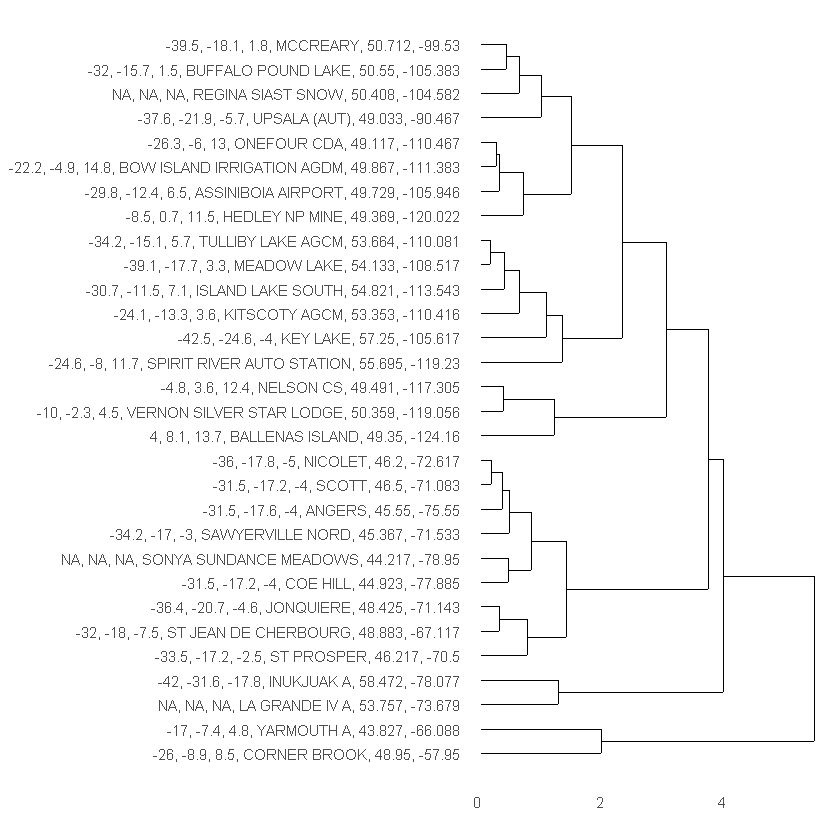

In [8]:
temp_loc_dataframe <- scale(data.frame("TotalPrecipitation" = random_stations$P,
                                       "Lat" = random_stations$Lat,
                                       "Long" = random_stations$Long), 
                            center = TRUE, scale = TRUE)

rownames(temp_loc_dataframe) <- paste(random_stations$Tn, random_stations$Tm, random_stations$Tx, random_stations$Stn_Name, random_stations$Lat, random_stations$Long, sep=", ")

D <- dist(as.matrix(temp_loc_dataframe))
hc <- hclust(D)
ggdendrogram(hc, rotate = TRUE, theme_dendro = TRUE, color = "tomato")

Choose threshold of __1.5__ to create distinct clusters:

In [9]:
threshold <- 1.5 # define threshold

groups <- cutree(hc, h=threshold) # cut three at defined threshold
num_clusters <- max(groups) # number of clusters

# show groups
groups





-22.2, -4.9, 14.8, BOW ISLAND IRRIGATION AGDM, 49.867, -111.383 
                                                              1 
                   -26.3, -6, 13, ONEFOUR CDA, 49.117, -110.467 
                                                              1 
              -8.5, 0.7, 11.5, HEDLEY NP MINE, 49.369, -120.022 
                                                              1 
           -32, -15.7, 1.5, BUFFALO POUND LAKE, 50.55, -105.383 
                                                              1 
     -10, -2.3, 4.5, VERNON SILVER STAR LODGE, 50.359, -119.056 
                                                              2 
                         -31.5, -17.2, -4, SCOTT, 46.5, -71.083 
                                                              3 
                    -26, -8.9, 8.5, CORNER BROOK, 48.95, -57.95 
                                                              4 
                    NA, NA, NA, LA GRANDE IV A, 53.757, -73.679 
                                                              5 
                    -39.5, -18.1, 1.8, MCCREARY, 50.712, -99.53 
                                                              1 
               -39.1, -17.7, 3.3, MEADOW LAKE, 54.133, -108.517 
                                                              6 
              -37.6, -21.9, -5.7, UPSALA (AUT), 49.033, -90.467 
                                                              1 
          -32, -18, -7.5, ST JEAN DE CHERBOURG, 48.883, -67.117 
                                                              3 
                    -17, -7.4, 4.8, YARMOUTH A, 43.827, -66.088 
                                                              7 
                        -31.5, -17.6, -4, ANGERS, 45.55, -75.55 
                                                              3 
             -24.1, -13.3, 3.6, KITSCOTY AGCM, 53.353, -110.416 
                                                              6 
                 -36.4, -20.7, -4.6, JONQUIERE, 48.425, -71.143 
                                                              3 
                    -31.5, -17.2, -4, COE HILL, 44.923, -77.885 
                                                              3 
                  4, 8.1, 13.7, BALLENAS ISLAND, 49.35, -124.16 
                                                              2 
    -24.6, -8, 11.7, SPIRIT RIVER AUTO STATION, 55.695, -119.23 
                                                              6 
                   -4.8, 3.6, 12.4, NELSON CS, 49.491, -117.305 
                                                              2 
                  -33.5, -17.2, -2.5, ST PROSPER, 46.217, -70.5 
                                                              3 
                    -42.5, -24.6, -4, KEY LAKE, 57.25, -105.617 
                                                              6 
        -29.8, -12.4, 6.5, ASSINIBOIA AIRPORT, 49.729, -105.946 
                                                              1 
         -34.2, -15.1, 5.7, TULLIBY LAKE AGCM, 53.664, -110.081 
                                                              6 
             NA, NA, NA, SONYA SUNDANCE MEADOWS, 44.217, -78.95 
                                                              3 
                NA, NA, NA, REGINA SIAST SNOW, 50.408, -104.582 
                                                              1 
         -30.7, -11.5, 7.1, ISLAND LAKE SOUTH, 54.821, -113.543 
                                                              6 
                         -36, -17.8, -5, NICOLET, 46.2, -72.617 
                                                              3 
              -34.2, -17, -3, SAWYERVILLE NORD, 45.367, -71.533 
                                                              3 
                 -42, -31.6, -17.8, INUKJUAK A, 58.472, -78.077 
                                                              5

### Add cluster labels to dataframe

In [10]:
random_stations <- cbind(random_stations, clusters =as.factor(as.vector(groups)))
head(random_stations)

Stn_Name,Lat,Long,Prov,Tm,DwTm,D,Tx,DwTx,Tn,...,P.N,S_G,Pd,BS,DwBS,BS.,HDD,CDD,Stn_No,clusters
BOW ISLAND IRRIGATION AGDM,49.867,-111.383,AB,-4.9,0,NA,14.8,0,-22.2,...,NA,NA,5,NA,NA,NA,640.4,0,3030772,1
ONEFOUR CDA,49.117,-110.467,AB,-6.0,0,NA,13.0,0,-26.3,...,NA,0,2,NA,NA,NA,672.0,0,3044923,1
HEDLEY NP MINE,49.369,-120.022,BC,0.7,6,4.4,11.5,6,-8.5,...,NA,NA,4,NA,NA,NA,379.9,0,1123390,1
BUFFALO POUND LAKE,50.550,-105.383,SK,-15.7,0,NA,1.5,0,-32.0,...,NA,0,0,NA,NA,NA,943.1,0,4010984,1
VERNON SILVER STAR LODGE,50.359,-119.056,BC,-2.3,13,NA,4.5,2,-10.0,...,NA,0,10,NA,NA,NA,305.2,0,1128584,2
SCOTT,46.500,-71.083,QC,-17.2,8,-7.3,-4.0,5,-31.5,...,NA,28,10,NA,NA,NA,703.8,0,7027840,3


### Check out clusters centroidsd

In [11]:
clusters_centers_dataframe <- aggregate(random_stations[, c("Lat", "Long")], list(cluster = random_stations$clusters), mean)
clusters_centers_dataframe

cluster,Lat,Long
1,49.84812,-105.97250
2,49.73333,-120.17367
3,46.25356,-72.93089
4,48.95000,-57.95000
5,56.11450,-75.87800
6,54.81933,-111.23400
7,43.82700,-66.08800
